### In this section, I will be using Feature Engineering to create ratio-based behavioral feature, as these are highly effective in Ethereum scam detection.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('../Data/Clean/clean_ethereum_data.csv')

### Creating 'Sent-Received-Ratio'

This ratio measures the imbalance between outgoing and incoming transactions. It's useful in scam detection:
- **High ratio** (≫ 1): May indicate wallets used to **drain funds** or rapidly **forward stolen assets**
- **Low ratio** (≪ 1): Might suggest **collector** wallets (e.g. airdrops)
- **Balanced ratio** (≈ 1): More typical of normal users or smart contracts

In [ ]:
#creating new columns for sent and received transactions and avoiding division by zero
df['sent_received_ratio'] = df['sent_tnx'] / (df['received_tnx'] + 1e-5)

Creating a histogram to plot check the distribution

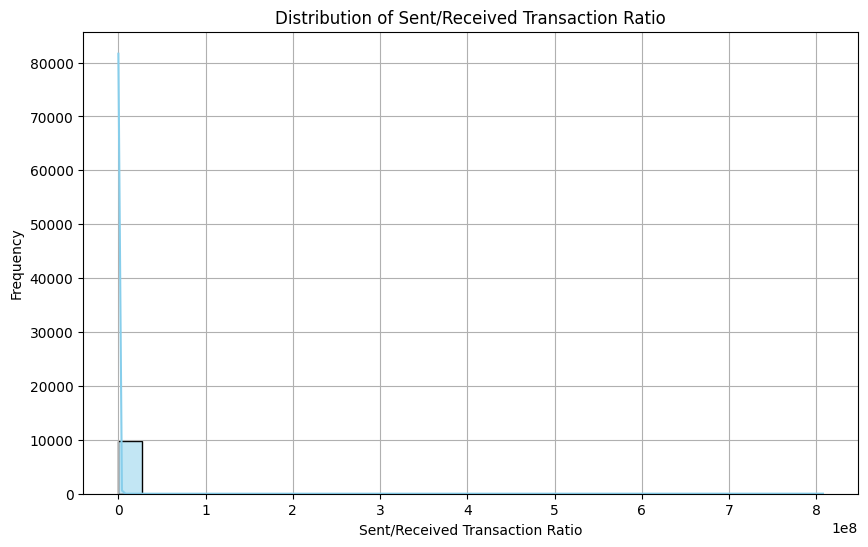

In [11]:
df['log_sent_received_ratio'] = np.log1p(df['sent_received_ratio'])

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='sent_received_ratio', bins=30, kde=True, color='skyblue')
plt.title('Distribution of Sent/Received Transaction Ratio')
plt.xlabel('Sent/Received Transaction Ratio')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Since the chart is not helpful, adjusting the analysis to filter out the top 1% of values to focus on the main distribution:

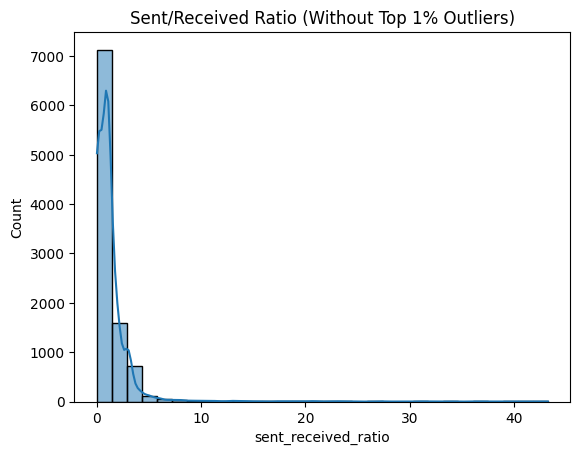

In [12]:
filtered = df[df['sent_received_ratio'] < df['sent_received_ratio'].quantile(0.99)]
sns.histplot(filtered['sent_received_ratio'], bins=30, kde=True)
plt.title('Sent/Received Ratio (Without Top 1% Outliers)')
plt.show()

### Findings:

The histogram of the log-transformed sent/received transaction ratio reveals a highly skewed distribution. The vast majority of addresses are concentrated in the first bar on the left, indicating that most addresses either send and receive transactions at similar rates or have very low overall activity. Only a small number of addresses exhibit much higher ratios, as shown by the few smaller bars extending to the right.

This pattern is typical in blockchain data, where most users have balanced or minimal activity, while a minority display highly unbalanced behavior. These outliers may represent either legitimate high-volume entities (such as exchanges or smart contracts) or potentially suspicious accounts, such as those involved in scams or abnormal transaction patterns.

Further analysis—such as comparing the distributions for scam versus non-scam addresses—can help determine whether this feature is predictive for scam detection.

### Next will create 'Unique Sent-to/Received-from Address Ratio'

Scam wallets often engage with a high number of unique addresses to obscure fund flows or execute phishing and malicious campaigns. A high or low ratio between unique sent-to and received-from addresses can signal abnormal activity, distinguishing scams from regular users.

In [13]:
df['unique_addr_ratio'] = df['unique_sent_to_addresses'] / (df['unique_received_from_addresses'] + 1e-5)

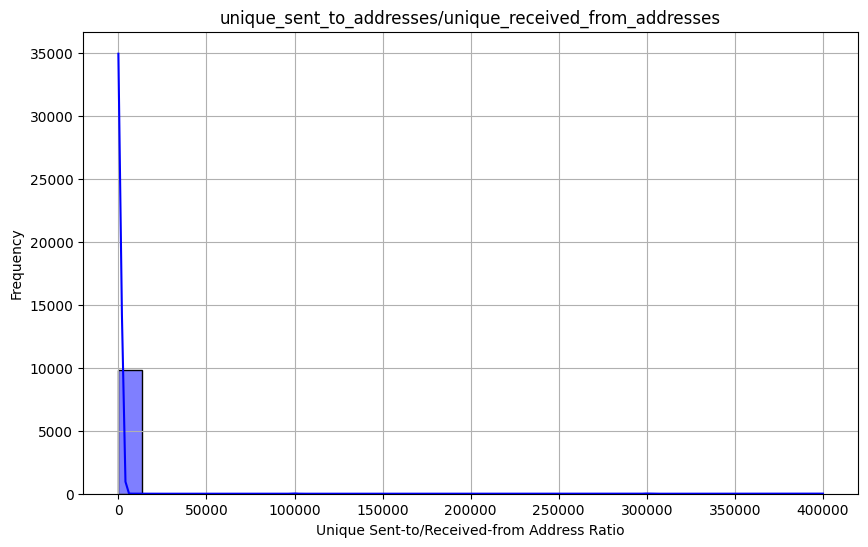

In [15]:
df['log_unique_addr_ratio'] = np.log1p(df['unique_addr_ratio'])

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='unique_addr_ratio', bins=30, kde=True, color='blue')
plt.title('unique_sent_to_addresses/unique_received_from_addresses')
plt.xlabel('Unique Sent-to/Received-from Address Ratio')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Outlier Analysis: Investigating the Right Tail 

In [16]:
# Define the threshold for the top 1% (right tail)
threshold = df['log_unique_addr_ratio'].quantile(0.99)

# Select outlier addresses
outliers = df[df['log_unique_addr_ratio'] >= threshold]

# Show the number of outliers and their scam flag distribution
print(f"Number of outlier addresses: {len(outliers)}")
print(outliers['flag'].value_counts())

Number of outlier addresses: 100
flag
0    94
1     6
Name: count, dtype: int64


The investigation shows that how many addresses are in the most extreme 1% for this feature. In blockchain studies, focusing on the top 1% of anomalous data points is a standard method to reduce the investigation scope while capturing most suspicious cases.
This outlier analysis can help prioritize addresses for further investigation.